# import `library` and `data`

In [1]:
import pandas as pd
import numpy as np
import re
import collections
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.utils.np_utils import to_categorical
import nltk
#from textblob import TextBlob
from datetime import datetime
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 


C:\Users\1809019\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF
 
KTF.set_session(tf.Session(config=tf.ConfigProto(device_count={'gpu':0})))

In [3]:
df = pd.read_csv("D:/python/kaggle_twitter_train.csv", encoding = "latin")
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [4]:
df.shape

(99989, 3)

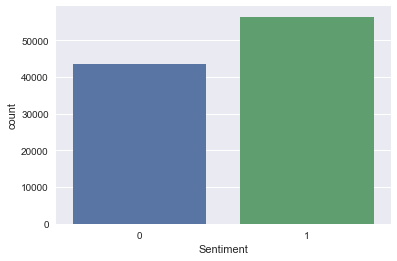

In [5]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="Sentiment", data=df)

# Preprocessing

In [7]:
def replaceContractions(sentence):
    outputSentence = sentence.lower()
    outputSentence = re.sub(r"\b%s\b" % "won't" , "will not", outputSentence)
    outputSentence = re.sub(r"\b%s\b" % "can't" , "can not", outputSentence)
    outputSentence = re.sub(r"\b%s\b" % "n't", " not", outputSentence)
    outputSentence = re.sub(r"\b%s\b" % "’t", " not", outputSentence)
    outputSentence = re.sub(r"\b%s\b" % "\'re", " are", outputSentence)
    outputSentence = re.sub(r"\b%s\b" % "’re" , " are", outputSentence)
    outputSentence = re.sub(r"\b%s\b" % "\'s", " is", outputSentence)
    outputSentence = re.sub(r"\b%s\b" % "’s", " is", outputSentence)
    outputSentence = re.sub(r"\b%s\b" % "\'d", " would", outputSentence)
    outputSentence = re.sub(r"\b%s\b" % "’d", " would", outputSentence)
    outputSentence = re.sub(r"\b%s\b" % "\'ll", " will", outputSentence)
    outputSentence = re.sub(r"\b%s\b" % "’ll", " will", outputSentence)
    outputSentence = re.sub(r"\b%s\b" % "\'t", " not", outputSentence)
    outputSentence = re.sub(r"\b%s\b" % "’t", " not", outputSentence)
    outputSentence = re.sub(r"\b%s\b" % "\'ve", " have", outputSentence)
    outputSentence = re.sub(r"\b%s\b" % "’ve", " have", outputSentence)
    outputSentence = re.sub(r"\b%s\b" % "\'m", " am", outputSentence)
    outputSentence = re.sub(r"\b%s\b" % "’m", " am", outputSentence)
    outputSentence = outputSentence.replace('\n', ' ')
    outputSentence = outputSentence.replace('\r', '')
    outputSentence = outputSentence.replace('‑',"-")
    return str(outputSentence)

In [8]:
def clean_data(data):
    data['SentimentText_RE'] = data['SentimentText'].apply(lambda x: re.sub(r'(@[A-Za-z0-9_]+|:[A-Za-z-])','',str(x).lower())) #delete @user
    data['SentimentText_RE'] = data['SentimentText_RE'].apply(lambda x: re.sub(r'https?://[A-Za-z0-9./]+','',x)) #delete https://
    stop = stopwords.words('english')
    data['SentimentText_RE'] = data['SentimentText_RE'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) # delete stop words
    #data['TXT'] = data['TXT'].apply(lambda x: x.encode().decode("utf-8-sig"))
    data['SentimentText_RE'] = data['SentimentText_RE'].apply(lambda x: re.sub(r'&amp','',x))
    data['SentimentText_RE'] = data['SentimentText_RE'].apply(lambda x: replaceContractions(x))
    data['SentimentText_RE'] = data['SentimentText_RE'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))
    data['SentimentText_RE'] = data['SentimentText_RE'].apply(lambda x: re.sub('(\[|\]|\(|\))','',x))
    
    #most_freq = pd.Series(' '.join(data['SentimentText_RE']).split()).value_counts()[:50]
    last_freq = pd.Series(' '.join(data['SentimentText_RE']).split()).value_counts()[-200:]
    
    freq = last_freq.index.tolist() # + most_freq.index.tolist() + last_freq.index.tolist()
    
    data['SentimentText_RE'] = data['SentimentText_RE'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
    
    st = PorterStemmer()
    data['SentimentText_RE'] = data['SentimentText_RE'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
    
    lemmatizer = WordNetLemmatizer()
    data['SentimentText_RE'] = data['SentimentText_RE'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
    
    data['WORD_COUNT'] = data['SentimentText_RE'].apply(lambda x: len(nltk.word_tokenize(x)))
    return data

In [19]:
df = clean_data(df)

In [20]:
df.head(7)

,ItemID,Sentiment,SentimentText,SentimentText_RE,WORD_COUNT
0,1,0,is so sad for my APL frie...,sad apl friend,3
1,2,0,I missed the New Moon trail...,miss new moon trailer,4
2,3,1,omg its already 7:30 :O,omg alreadi 730,3
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cri i have dentist sin...,17
4,5,0,i think mi bf is cheating on me!!! ...,think mi bf cheat me t_t,6
5,6,0,or i just worry too much?,worri much,2
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,juuuuuuuuuuuuuuuuussssst chillin,2


In [22]:
df = df.loc[df['WORD_COUNT']>=2].reset_index(drop=True)

In [21]:
df.shape

(99989, 5)

In [23]:
df.describe()

,ItemID,Sentiment,WORD_COUNT
count,95548.000000,95548.000000,95548.000000
mean,49830.648962,0.562544,7.733129
std,28902.892152,0.496075,4.080768
min,1.000000,0.000000,2.000000
25%,24686.500000,0.000000,4.000000
50%,49810.500000,1.000000,7.000000
75%,74830.250000,1.000000,11.000000
max,100000.000000,1.000000,72.000000


## Prepare for model

In [24]:
X = df['SentimentText_RE']
y = df['Sentiment']

In [25]:
X_train_text, X_test_text, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [26]:
y_train.values

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [27]:
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

In [28]:
num_words=2000
max_len=30

In [29]:
token = Tokenizer(num_words=num_words)
token.fit_on_texts(X_train_text)

In [30]:
X_train_seq = token.texts_to_sequences(X_train_text.tolist())
X_test_seq = token.texts_to_sequences(X_test_text.tolist())

In [31]:
X_train = sequence.pad_sequences(X_train_seq, maxlen=max_len)
X_test = sequence.pad_sequences(X_test_seq, maxlen=max_len)

# RNN / LSTM

In [32]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN
from keras.layers.recurrent import LSTM

In [33]:
model = Sequential()

In [34]:
model.add(Embedding(output_dim=128,
                    input_dim=num_words,
                    input_length=max_len))
model.add(Dropout(0.2))

In [35]:
#model.add(SimpleRNN(units=64))
model.add(LSTM(64,dropout=0.2))

In [36]:
#model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))

In [37]:
model.add(Dense(units=256,
                activation='relu'))
model.add(Dropout(0.35))

In [38]:
model.add(Dense(units=1,
                activation='sigmoid'))

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 128)           256000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 322,305
Trainable params: 322,305
Non-trainable params: 0
_________________________________________________________________


# 訓練模型

In [40]:
model.compile(loss='mean_squared_error', #binary_cross_entropy
              optimizer='adam',
              metrics=['accuracy'])

In [41]:
epochs=20
batch_size=30

In [42]:
train_hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

Train on 53506 samples, validate on 13377 samples
Epoch 1/20
53506/53506 [==============================] - 41s 761us/step - loss: 0.1843 - acc: 0.7206 - val_loss: 0.1754 - val_acc: 0.7325
Epoch 2/20
53506/53506 [==============================] - 40s 742us/step - loss: 0.1670 - acc: 0.7525 - val_loss: 0.1755 - val_acc: 0.7363
Epoch 3/20
53506/53506 [==============================] - 39s 720us/step - loss: 0.1599 - acc: 0.7637 - val_loss: 0.1770 - val_acc: 0.7332
Epoch 4/20
53506/53506 [==============================] - 38s 708us/step - loss: 0.1541 - acc: 0.7748 - val_loss: 0.1779 - val_acc: 0.7336
Epoch 5/20
53506/53506 [==============================] - 39s 731us/step - loss: 0.1490 - acc: 0.7849 - val_loss: 0.1818 - val_acc: 0.7302
Epoch 6/20
53506/53506 [==============================] - 38s 708us/step - loss: 0.1443 - acc: 0.7912 - val_loss: 0.1853 - val_acc: 0.7276
Epoch 7/20
53506/53506 [==============================] - 39s 725us/step - loss: 0.1385 - acc: 0.8033 - val_loss: 0.

In [ ]:
# save model
#from datetime import datetime
#model.save('CEM_LSTM_'+datetime.now().strftime('%Y-%m-%d')+'.h5')

In [ ]:
###### load moel
#from keras.models import load_model
#model = load_model('CEM_LSTM_2019-02-12.h5')

# See loss and acc of testing

In [61]:
scores = model.evaluate(X_test, y_test, verbose=1) #loss, accuracy
scores

28665/28665 [==============================] - 4s 137us/step


[0.23497812801810558, 0.7131344845692941]

# Prediction

In [62]:
predict = model.predict_classes(X_test)

In [63]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test, y_pred=predict)
print(confmat)

[[ 7827  4712]
 [ 3511 12615]]


In [63]:
pd.DataFrame({'Text':X_test_text.values,'Sentiment':y_test.values, 'Prediction': predict.reshape(-1)})

,Prediction,Sentiment,Text
0,0,0,that is wanted take you i am sorry failed
1,1,0,maths gcse tomorrow haha listening mcfly watc...
2,1,0,gotta take break muay thai monthgotta see ill ...
3,1,0,quest available get epic flying skill
4,1,1,one quotunnecessarilyquot quotredundantquot un...
5,1,1,lucky love
6,1,0,life always good right
7,0,0,excellent hike weather west side cloudy cold
8,1,0,yes castle time tomorrow
9,1,1,waves new followers good morning others
